In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from fuzzywuzzy import process, fuzz
from tabulate import tabulate
pd.set_option('display.max_rows', None)    
from tqdm import tqdm
import ast
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# !wget https://www.dropbox.com/s/3x1w789mmuae3ao/yelp_academic_dataset_business.zip


In [3]:
# !unzip /kaggle/working/yelp_academic_dataset_business.zip

In [4]:
df = pd.read_json('/kaggle/working/yelp_academic_dataset_business.json', lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [5]:
df.shape

(192609, 14)

In [6]:
df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      28836
categories        482
hours           44830
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

In [9]:
df.shape

(129268, 14)

In [10]:
# Filter for Nevada restaurants
lasVegas = df[df['state'] == 'NV']

# Clean data for geographical plots
df_geo = df.dropna(subset=['latitude', 'longitude', 'stars'])
lasVegas_geo = lasVegas.dropna(subset=['latitude', 'longitude', 'stars'])

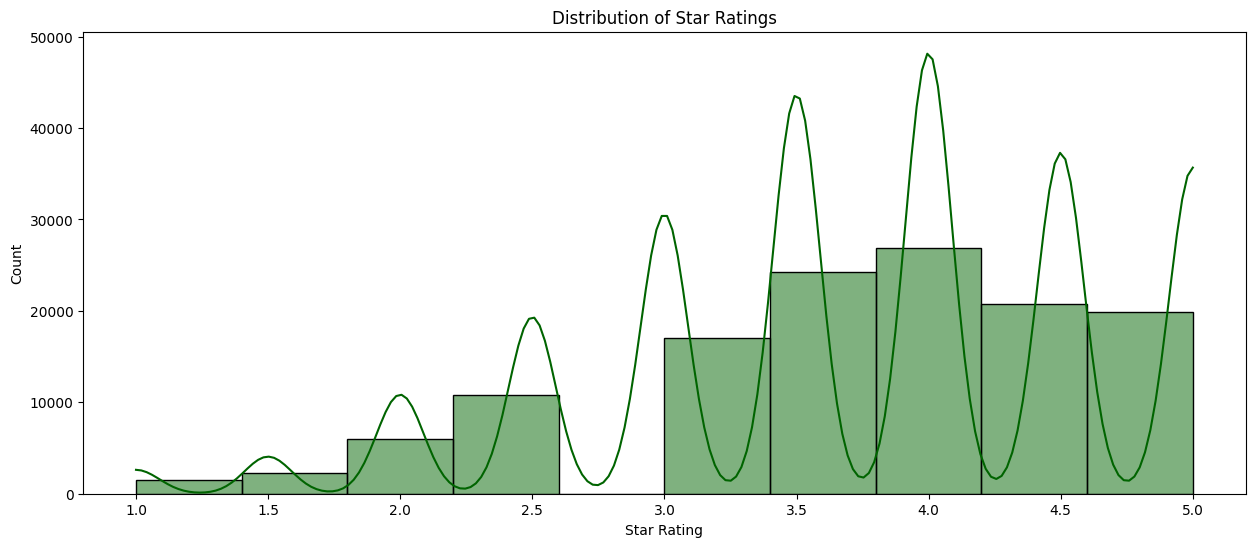

In [11]:
plt.figure(figsize=(15, 6))
sns.histplot(df['stars'], bins=10, kde=True,color="darkgreen")
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

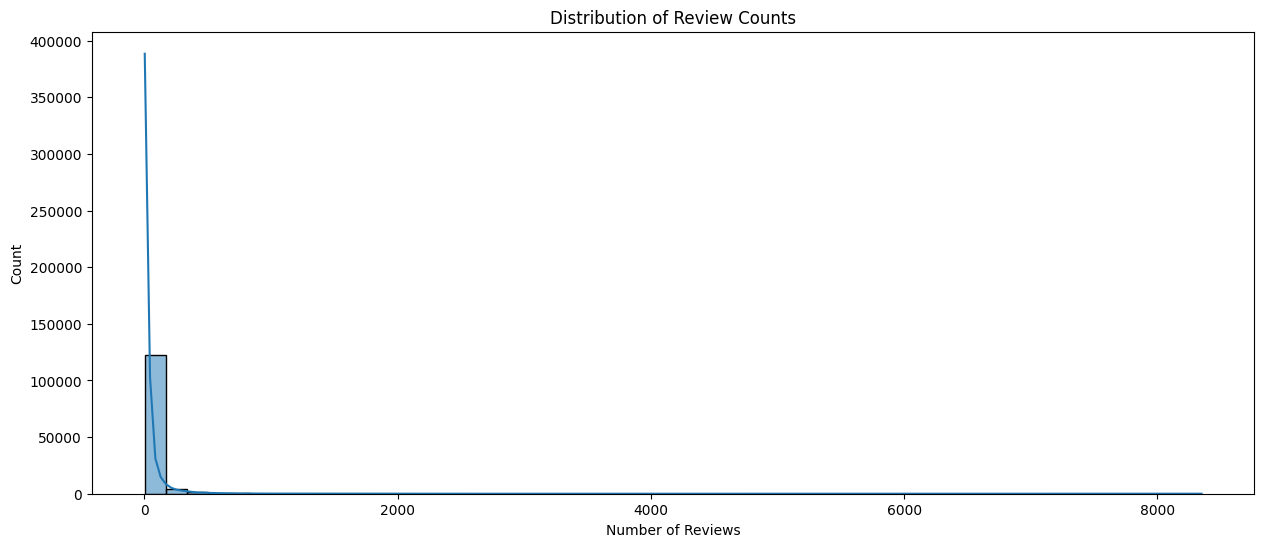

In [12]:
plt.figure(figsize=(15, 6))
sns.histplot(df['review_count'], bins=50, kde=True)
plt.title('Distribution of Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

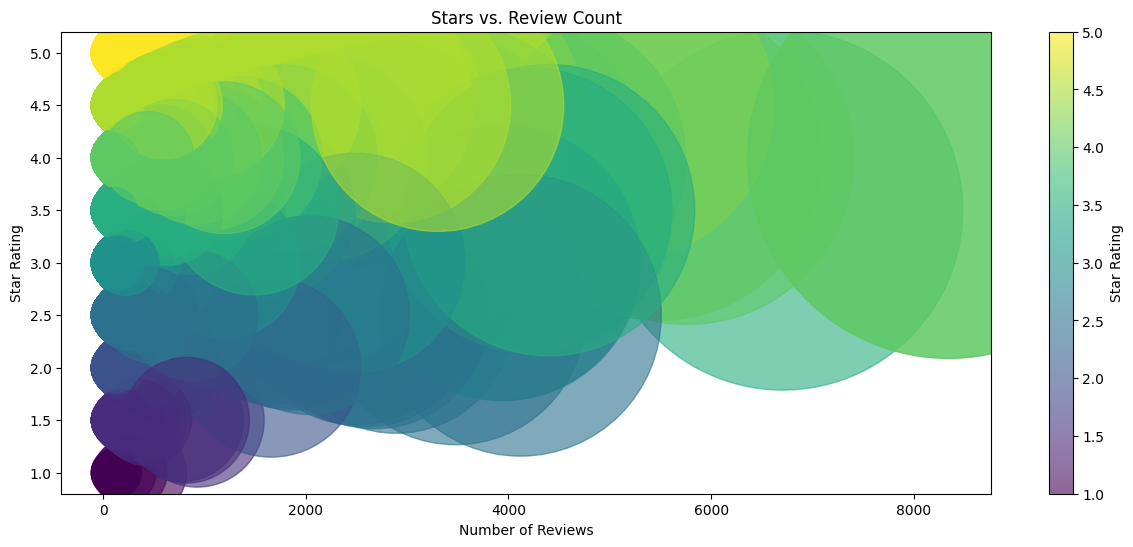

In [13]:
plt.figure(figsize=(15, 6))
plt.scatter(df['review_count'], df['stars'], s=df['review_count']*10, c=df['stars'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Star Rating')
plt.title('Stars vs. Review Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Star Rating')
plt.show()

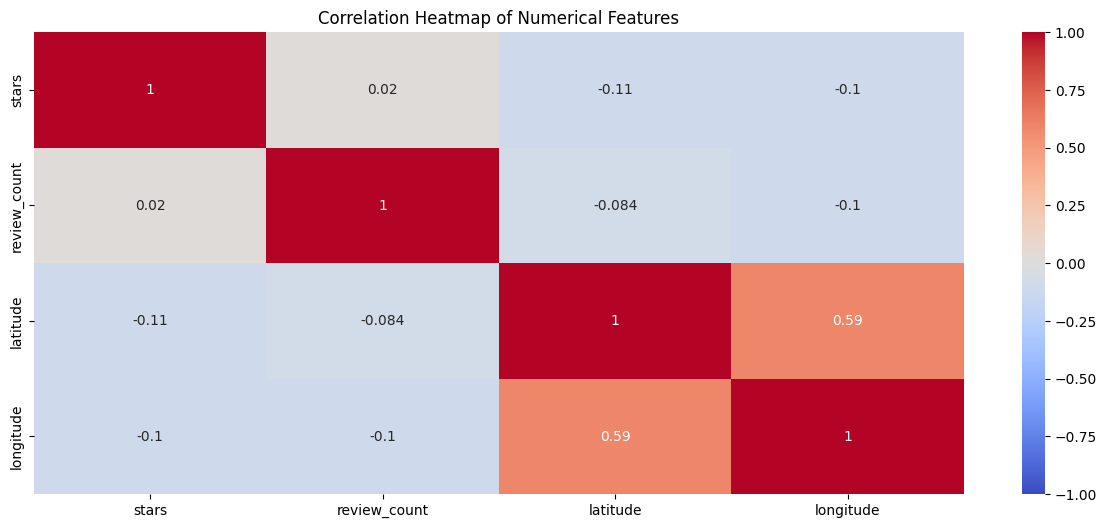

In [14]:
numerical_cols = ['stars', 'review_count', 'latitude', 'longitude']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

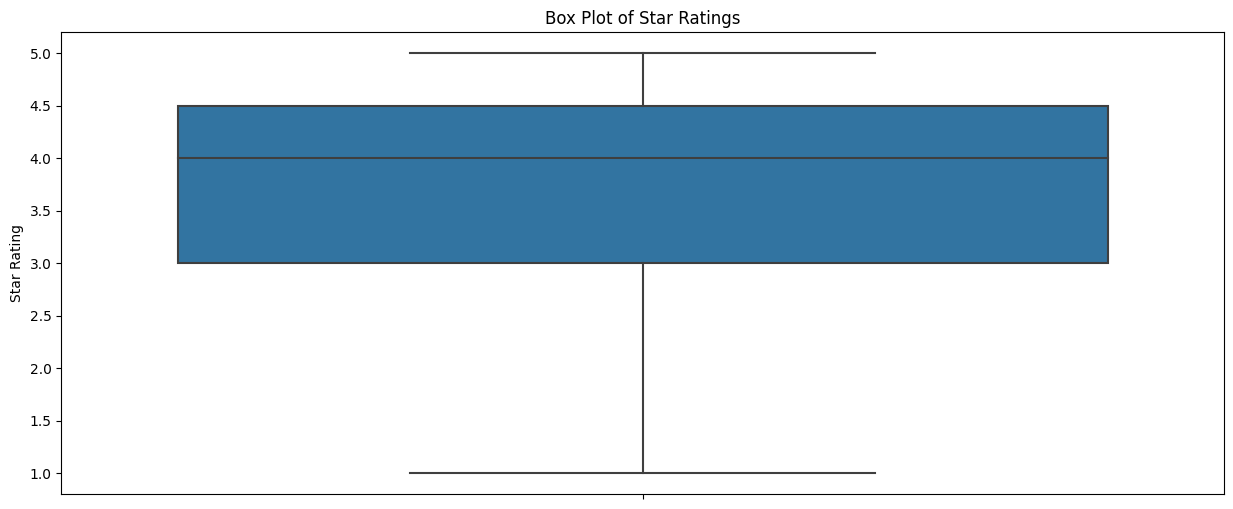

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['stars'])
plt.title('Box Plot of Star Ratings')
plt.ylabel('Star Rating')
plt.show()


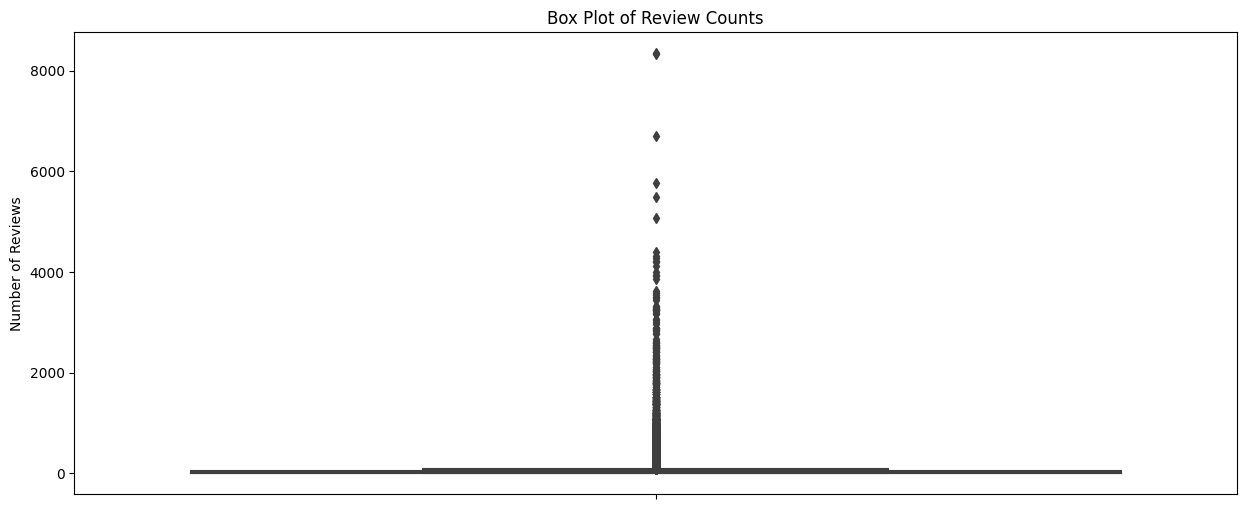

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['review_count'])
plt.title('Box Plot of Review Counts')
plt.ylabel('Number of Reviews')
plt.show()

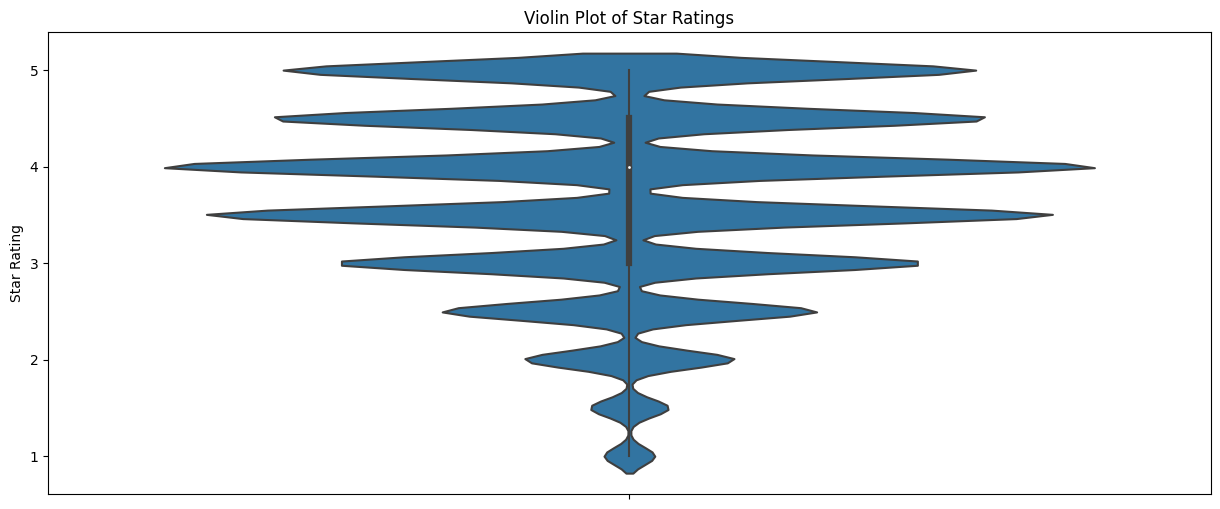

In [17]:
plt.figure(figsize=(15, 6))
sns.violinplot(y=df['stars'])
plt.title('Violin Plot of Star Ratings')
plt.ylabel('Star Rating')
plt.show()

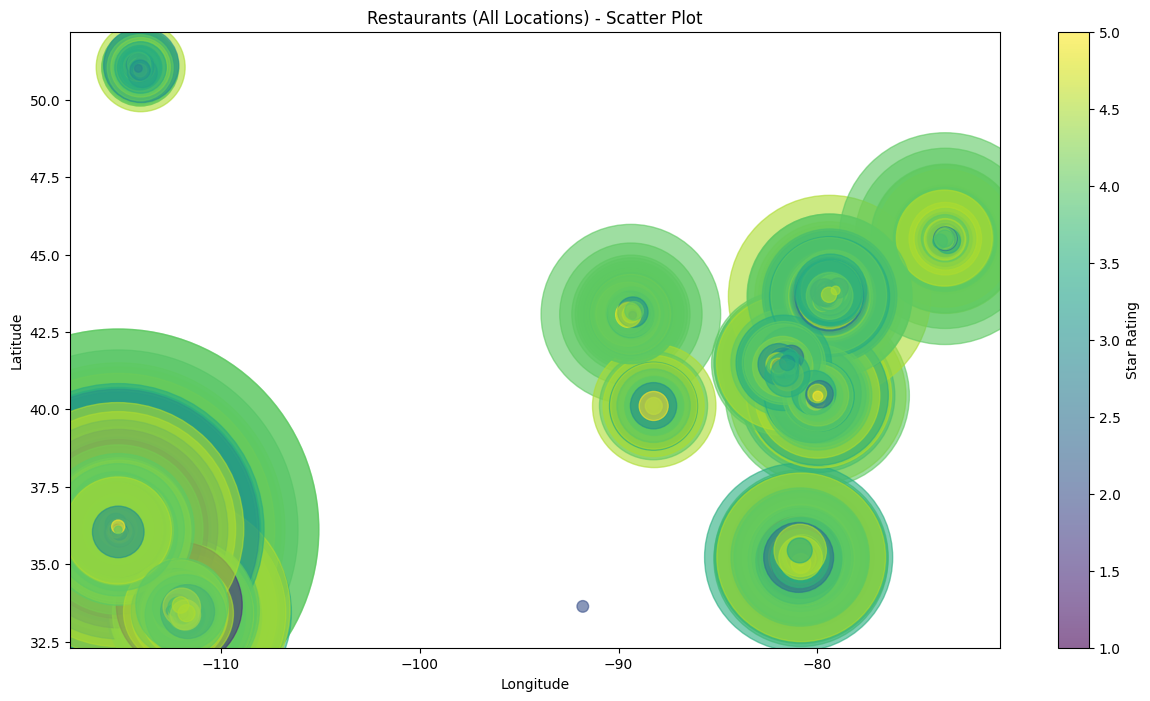

In [18]:
plt.figure(figsize=(15, 8))
plt.scatter(df_geo['longitude'], df_geo['latitude'], s=df_geo['review_count']*10, c=df_geo['stars'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Star Rating')
plt.title('Restaurants (All Locations) - Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

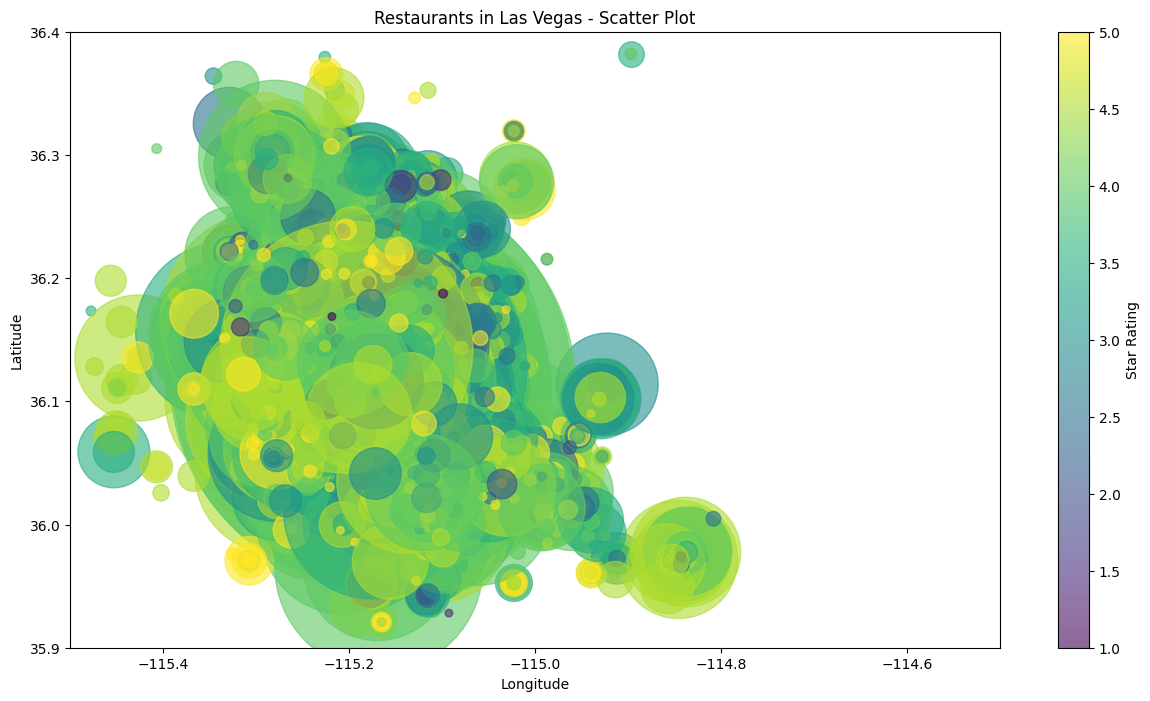

In [19]:
plt.figure(figsize=(15, 8))
plt.scatter(lasVegas_geo['longitude'], lasVegas_geo['latitude'], s=lasVegas_geo['review_count']*10, c=lasVegas_geo['stars'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Star Rating')
plt.title('Restaurants in Las Vegas - Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-115.5, -114.5)  # Approximate Las Vegas bounds
plt.ylim(35.9, 36.4)
plt.show()

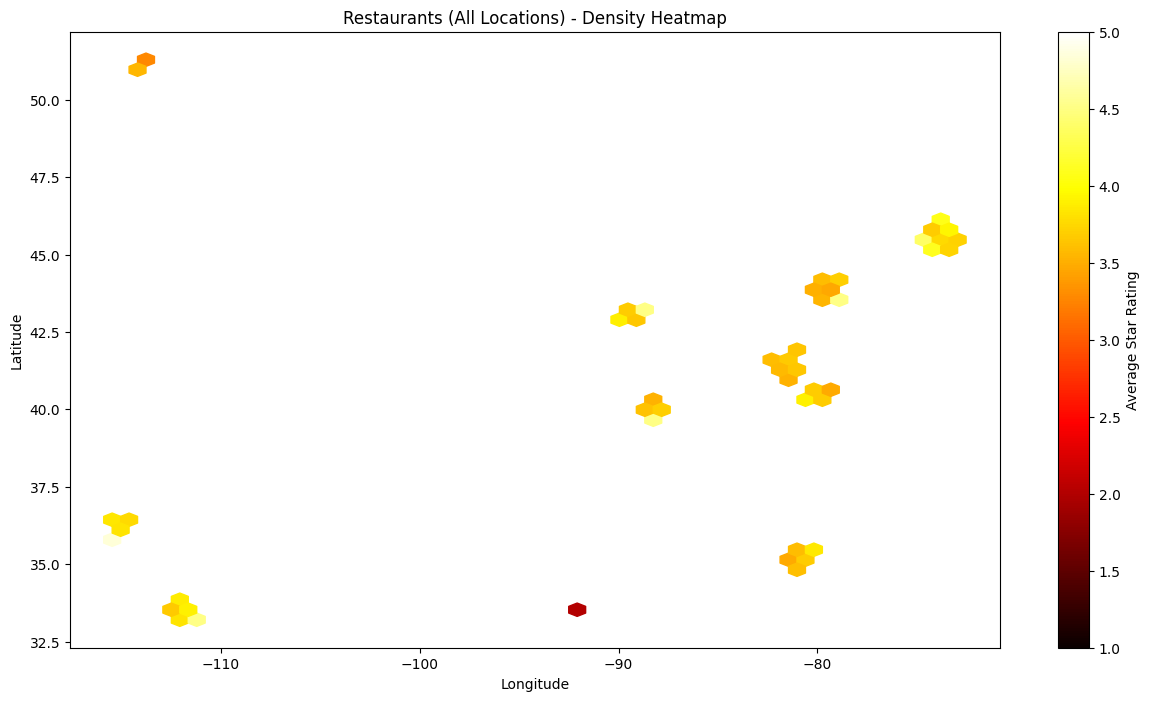

In [20]:
plt.figure(figsize=(15, 8))
plt.hexbin(df_geo['longitude'], df_geo['latitude'], C=df_geo['stars'], gridsize=50, cmap='hot', vmin=1, vmax=5)
plt.colorbar(label='Average Star Rating')
plt.title('Restaurants (All Locations) - Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

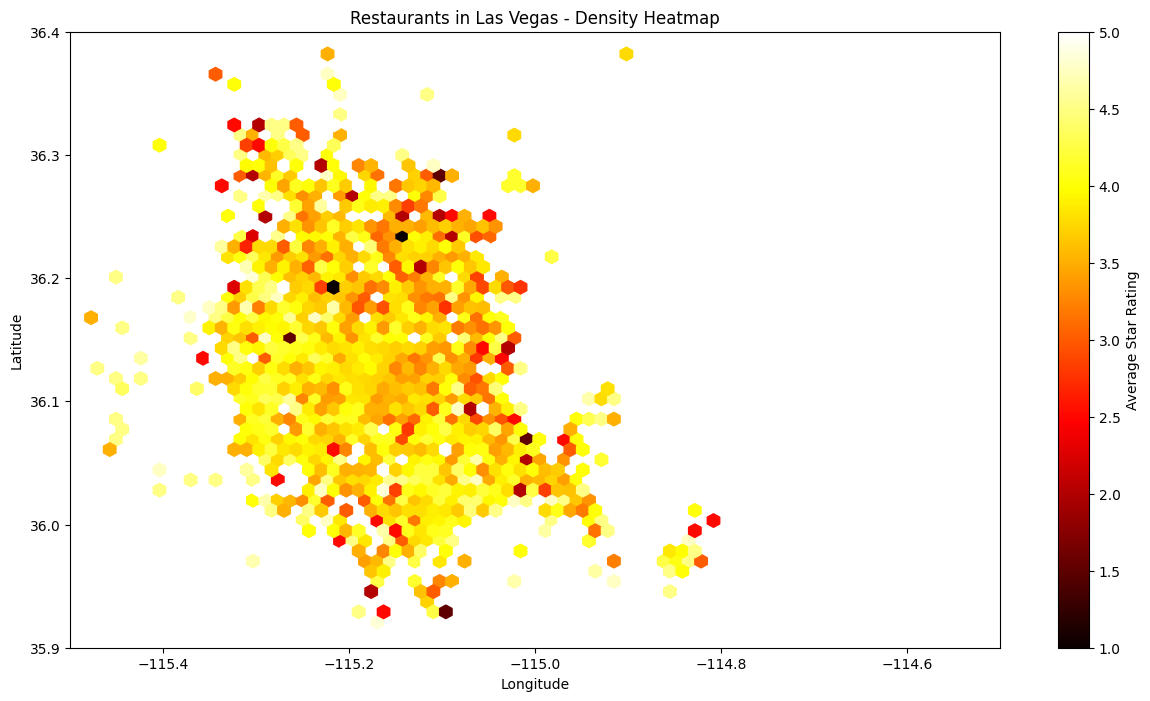

In [21]:
plt.figure(figsize=(15, 8))
plt.hexbin(lasVegas_geo['longitude'], lasVegas_geo['latitude'], C=lasVegas_geo['stars'], gridsize=50, cmap='hot', vmin=1, vmax=5)
plt.colorbar(label='Average Star Rating')
plt.title('Restaurants in Las Vegas - Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-115.5, -114.5)  # Approximate Las Vegas bounds
plt.ylim(35.9, 36.4)
plt.show()

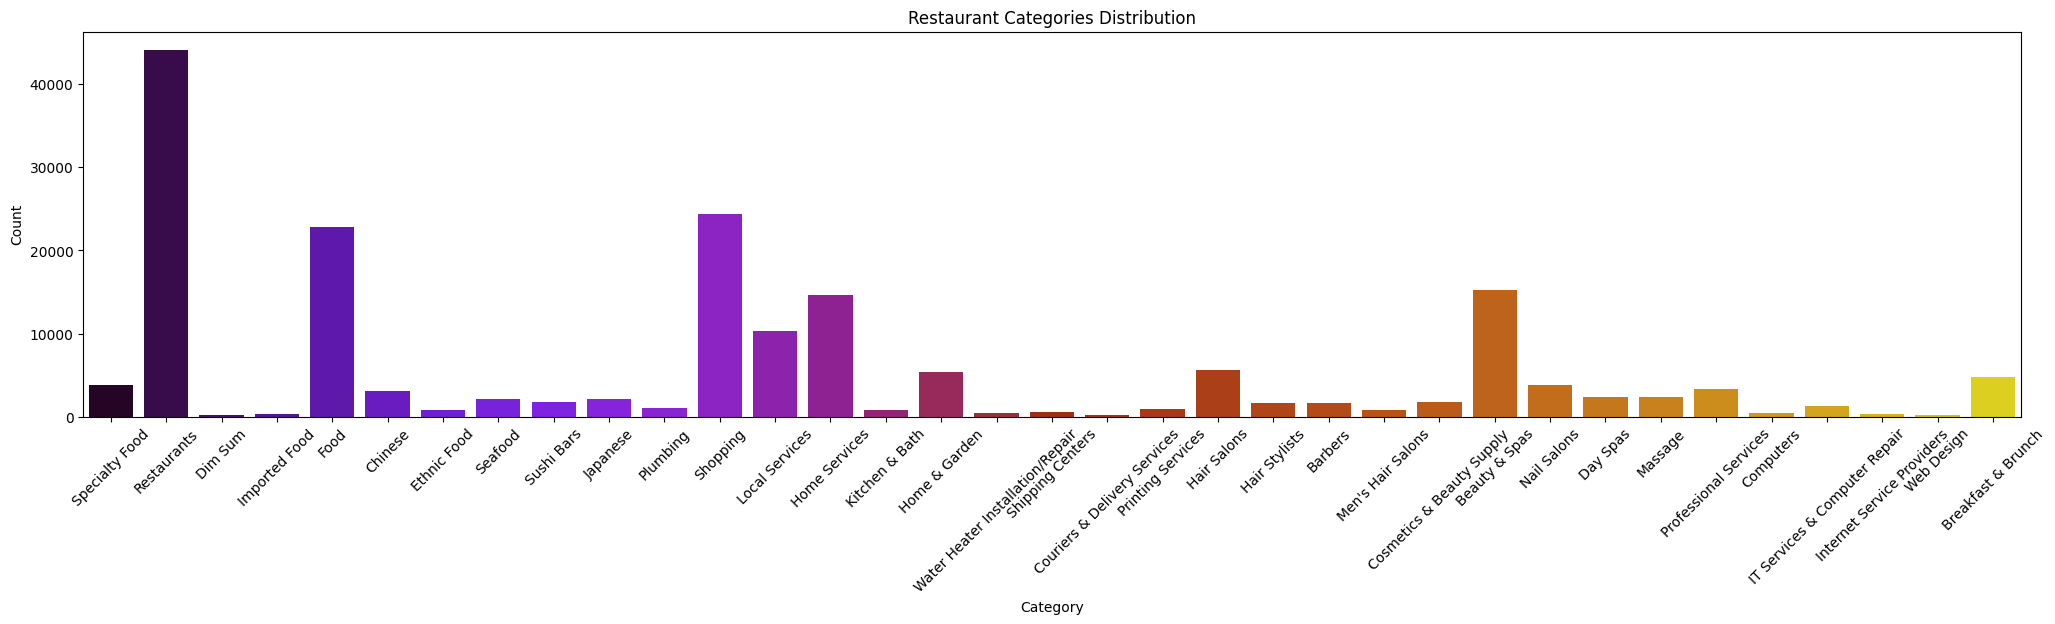

In [22]:
from collections import Counter
all_categories = []
for cats in df['categories'].dropna():
    all_categories.extend(cats.split(', '))
category_counts = Counter(all_categories)
category_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])
plt.figure(figsize=(25, 5))
sns.barplot(x='Category', y='Count', data=category_df[: 35],palette="gnuplot")
plt.title('Restaurant Categories Distribution')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

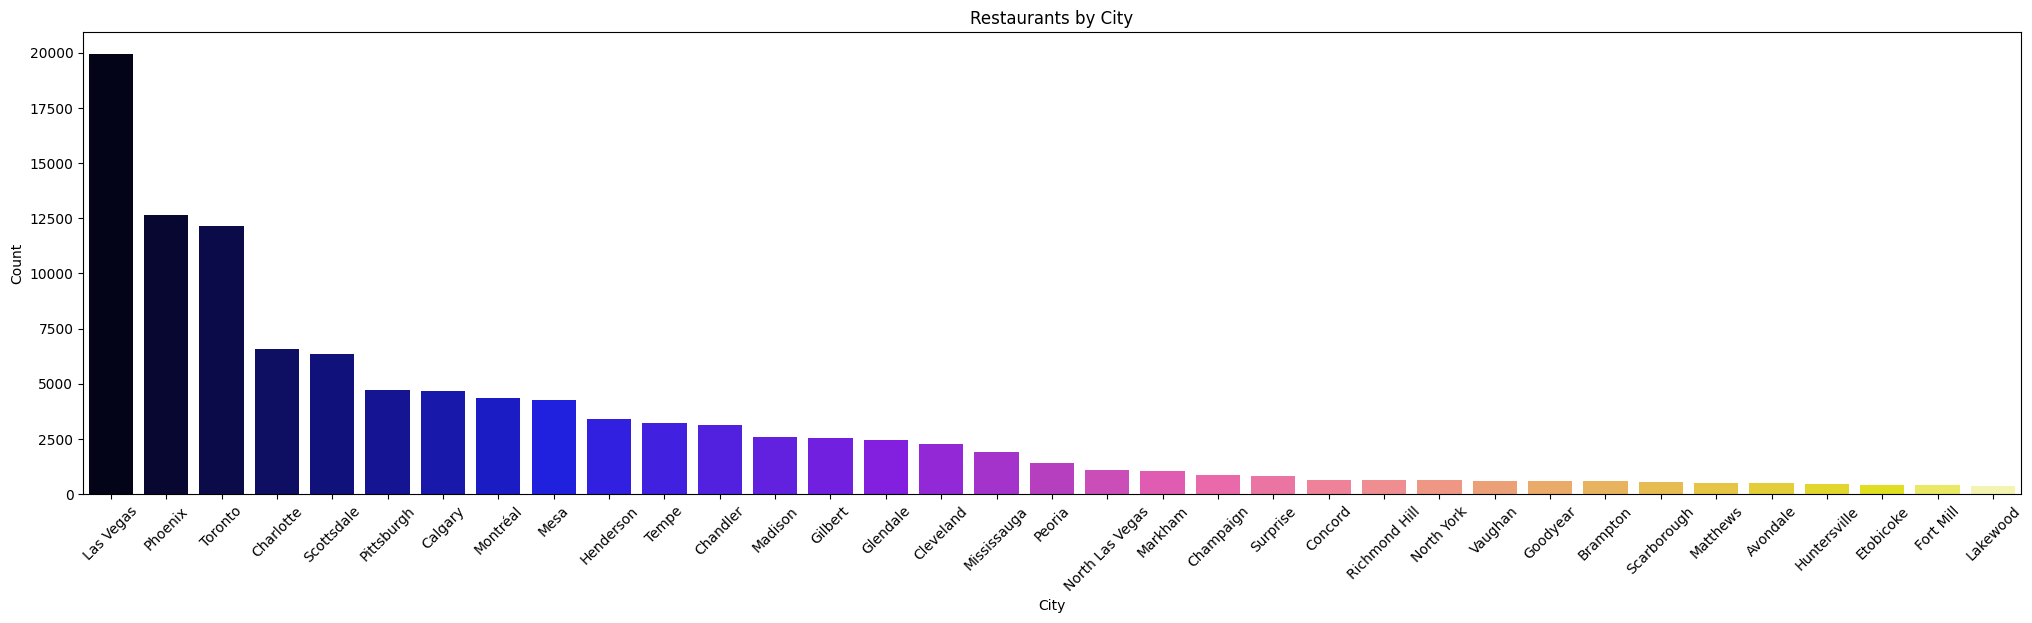

In [23]:
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']
plt.figure(figsize=(25, 6))
sns.barplot(x='City', y='Count', data=city_counts[: 35],palette="gnuplot2")
plt.title('Restaurants by City')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

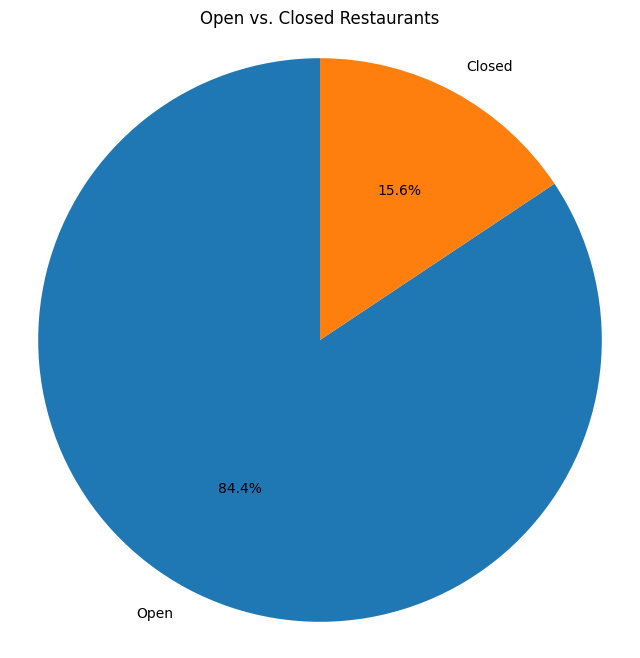

In [24]:
open_counts = df['is_open'].value_counts().reset_index()
open_counts.columns = ['Status', 'Count']
open_counts['Status'] = open_counts['Status'].map({1: 'Open', 0: 'Closed'})
plt.figure(figsize=(8, 8))
plt.pie(open_counts['Count'], labels=open_counts['Status'], autopct='%1.1f%%', startangle=90)
plt.axis("equal")
plt.title('Open vs. Closed Restaurants')
plt.show()

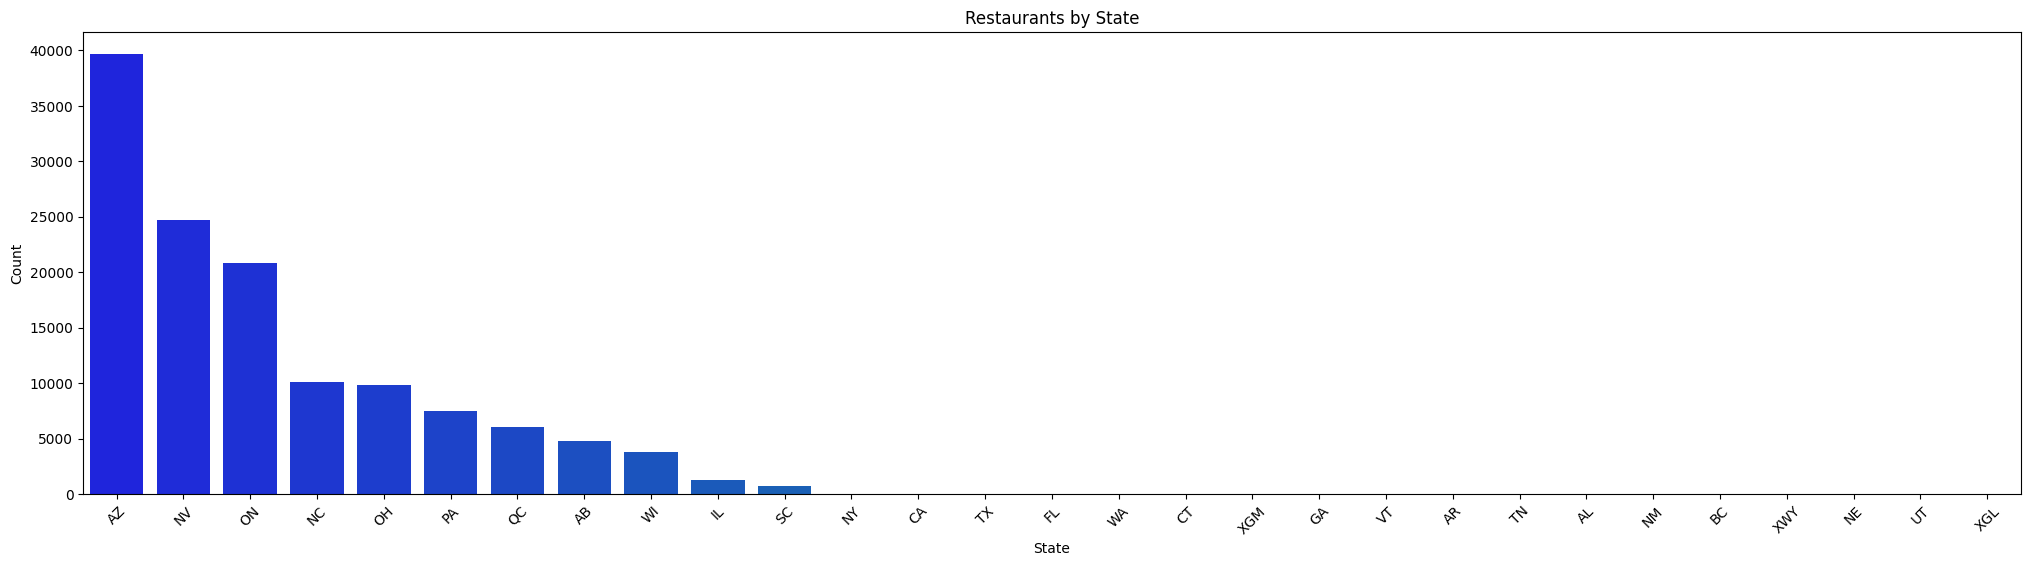

In [25]:
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
plt.figure(figsize=(25, 6))
sns.barplot(x='State', y='Count', data=state_counts,palette="winter")
plt.title('Restaurants by State')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

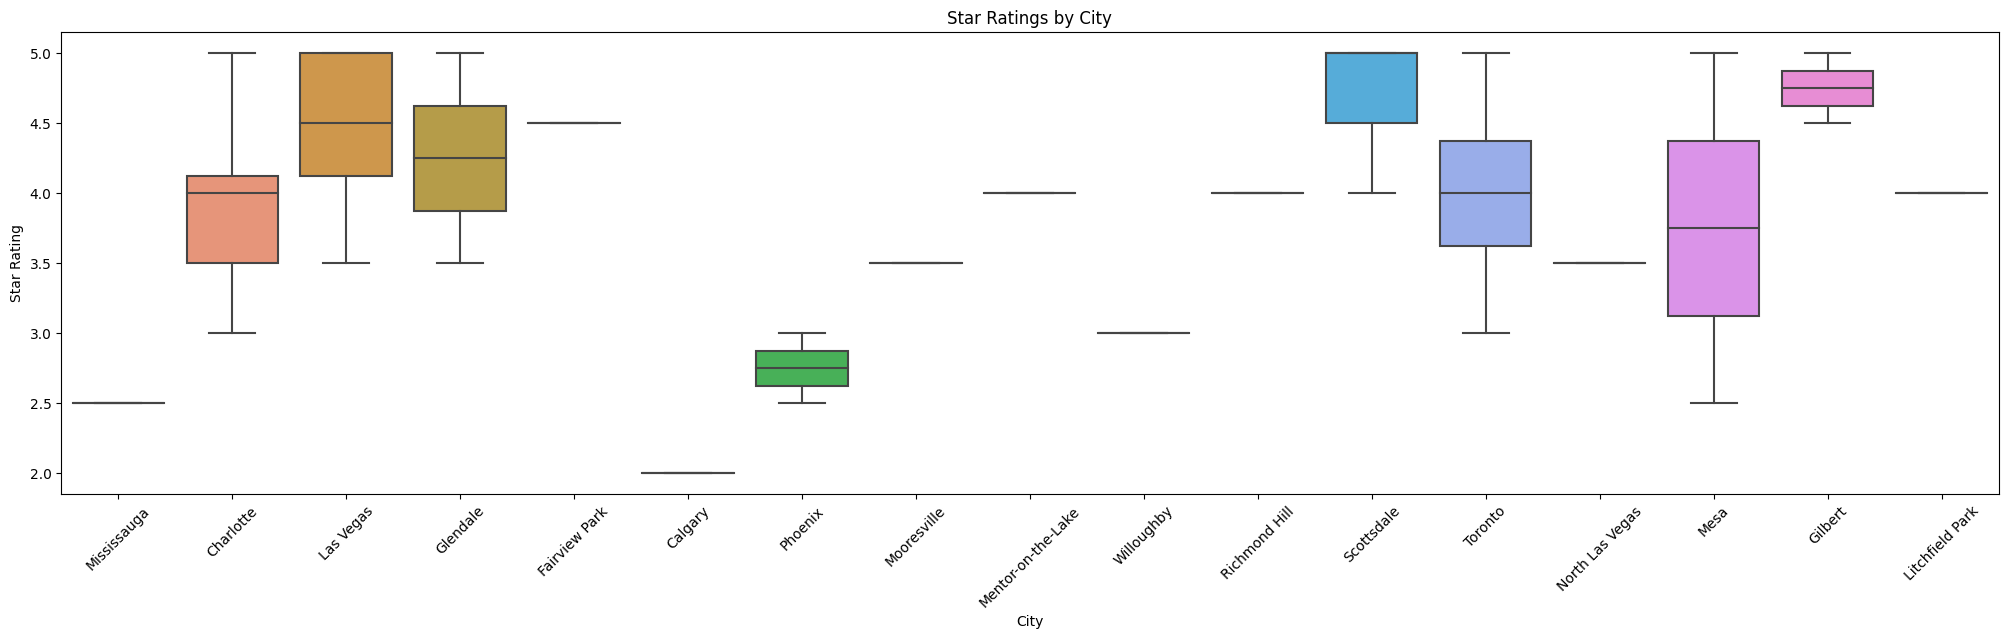

In [26]:
plt.figure(figsize=(25, 6))
sns.boxplot(x='city', y='stars', data=df[: 45])
plt.title('Star Ratings by City')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Star Rating')
plt.show()

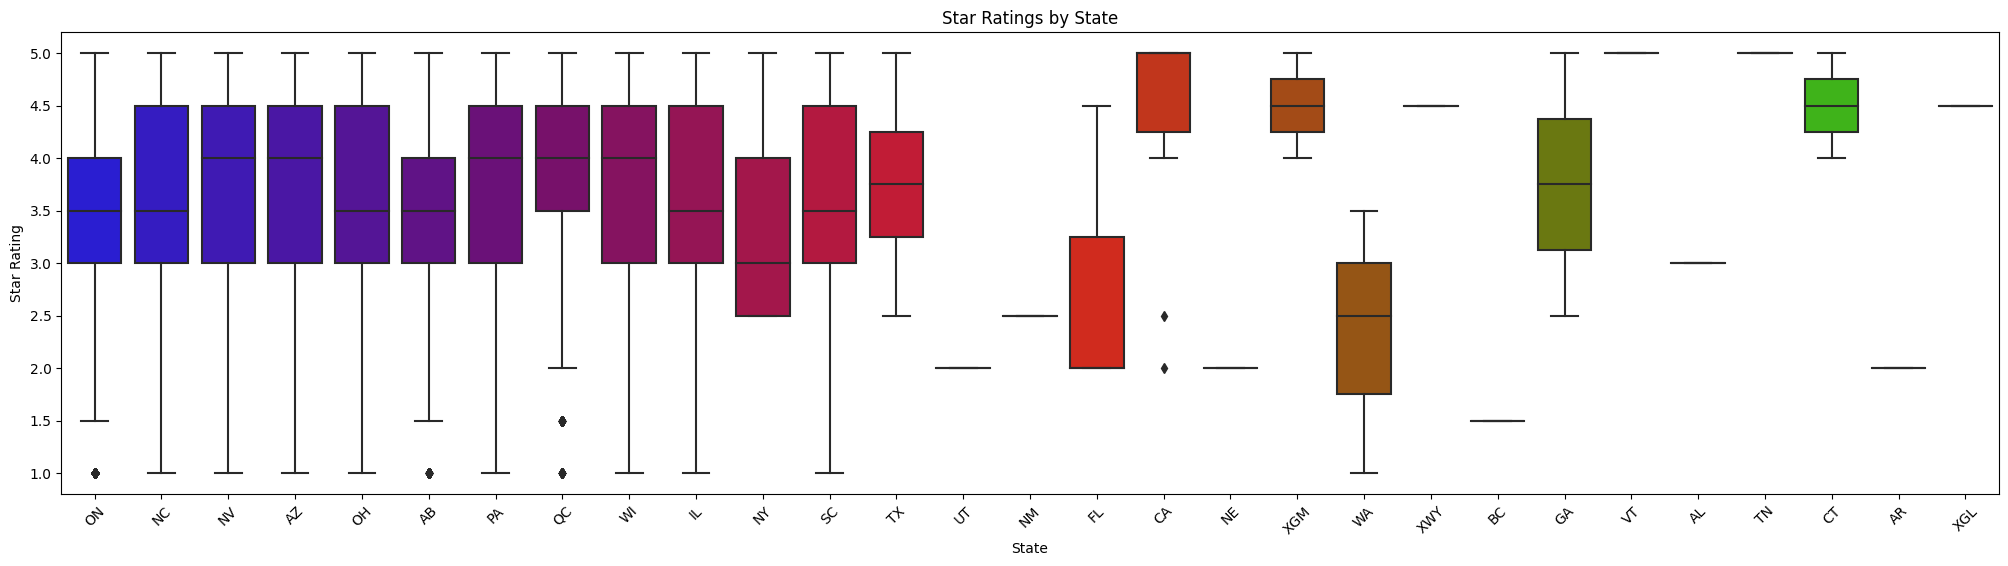

In [27]:
plt.figure(figsize=(25, 6))
sns.boxplot(x='state', y='stars', data=df,palette="brg")
plt.title('Star Ratings by State')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Star Rating')
plt.show()

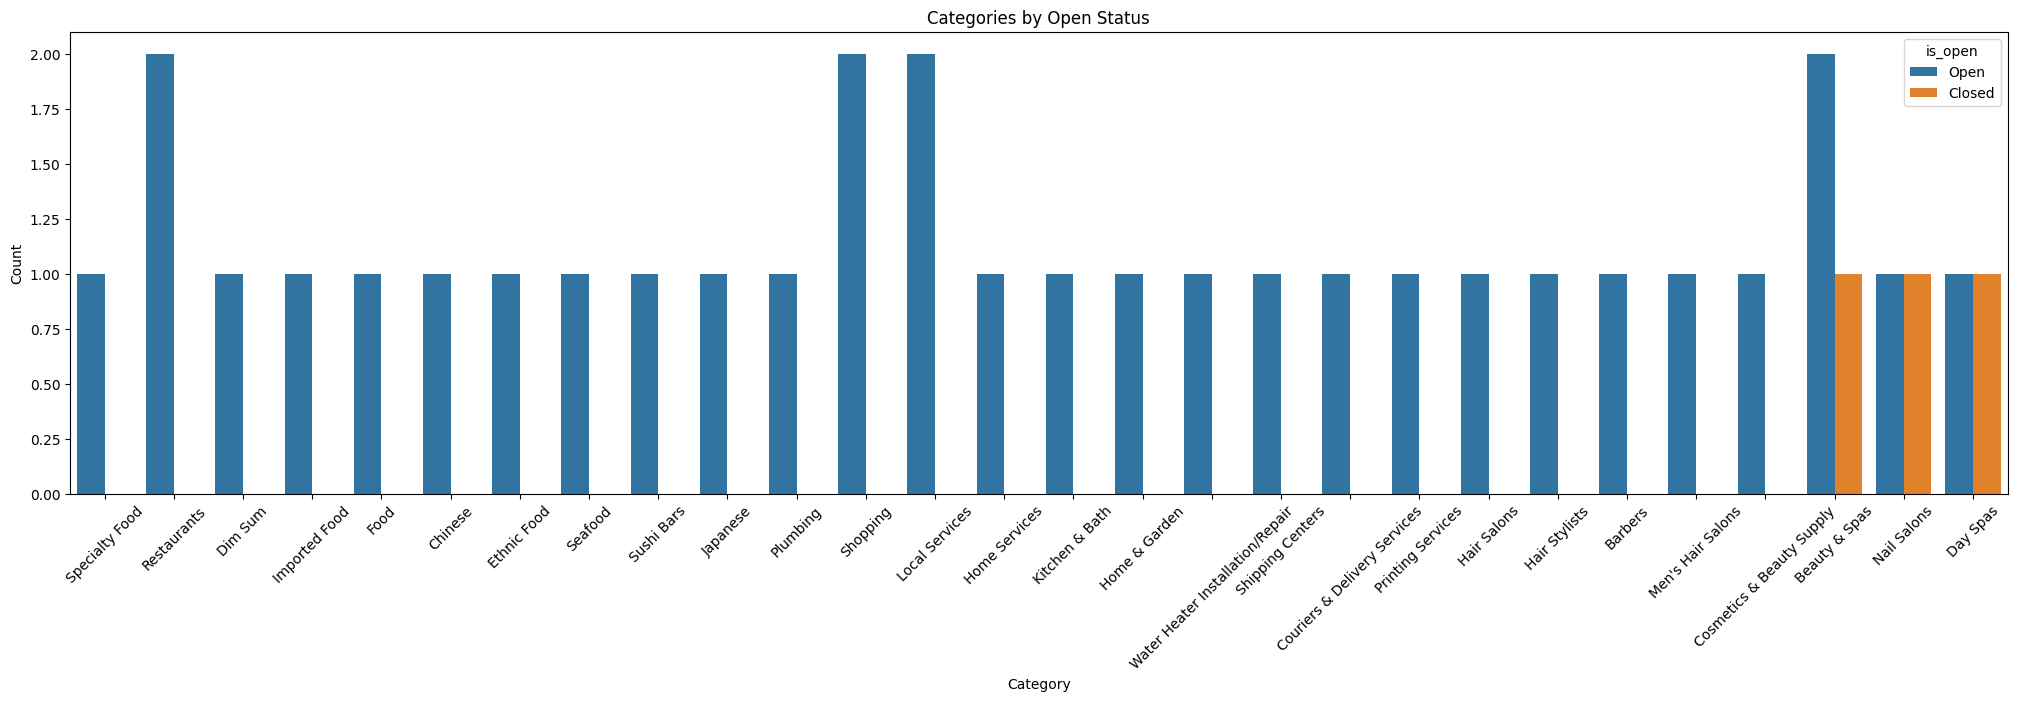

In [28]:
category_open = []
for idx, row in df.iterrows():
    for cat in row['categories'].split(', '):
        category_open.append({'Category': cat, 'is_open': row['is_open']})
category_open_df = pd.DataFrame(category_open)
category_open_df['is_open'] = category_open_df['is_open'].map({1: 'Open', 0: 'Closed'})
plt.figure(figsize=(25, 6))
sns.countplot(x='Category', hue='is_open', data=category_open_df[: 35])
plt.title('Categories by Open Status')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


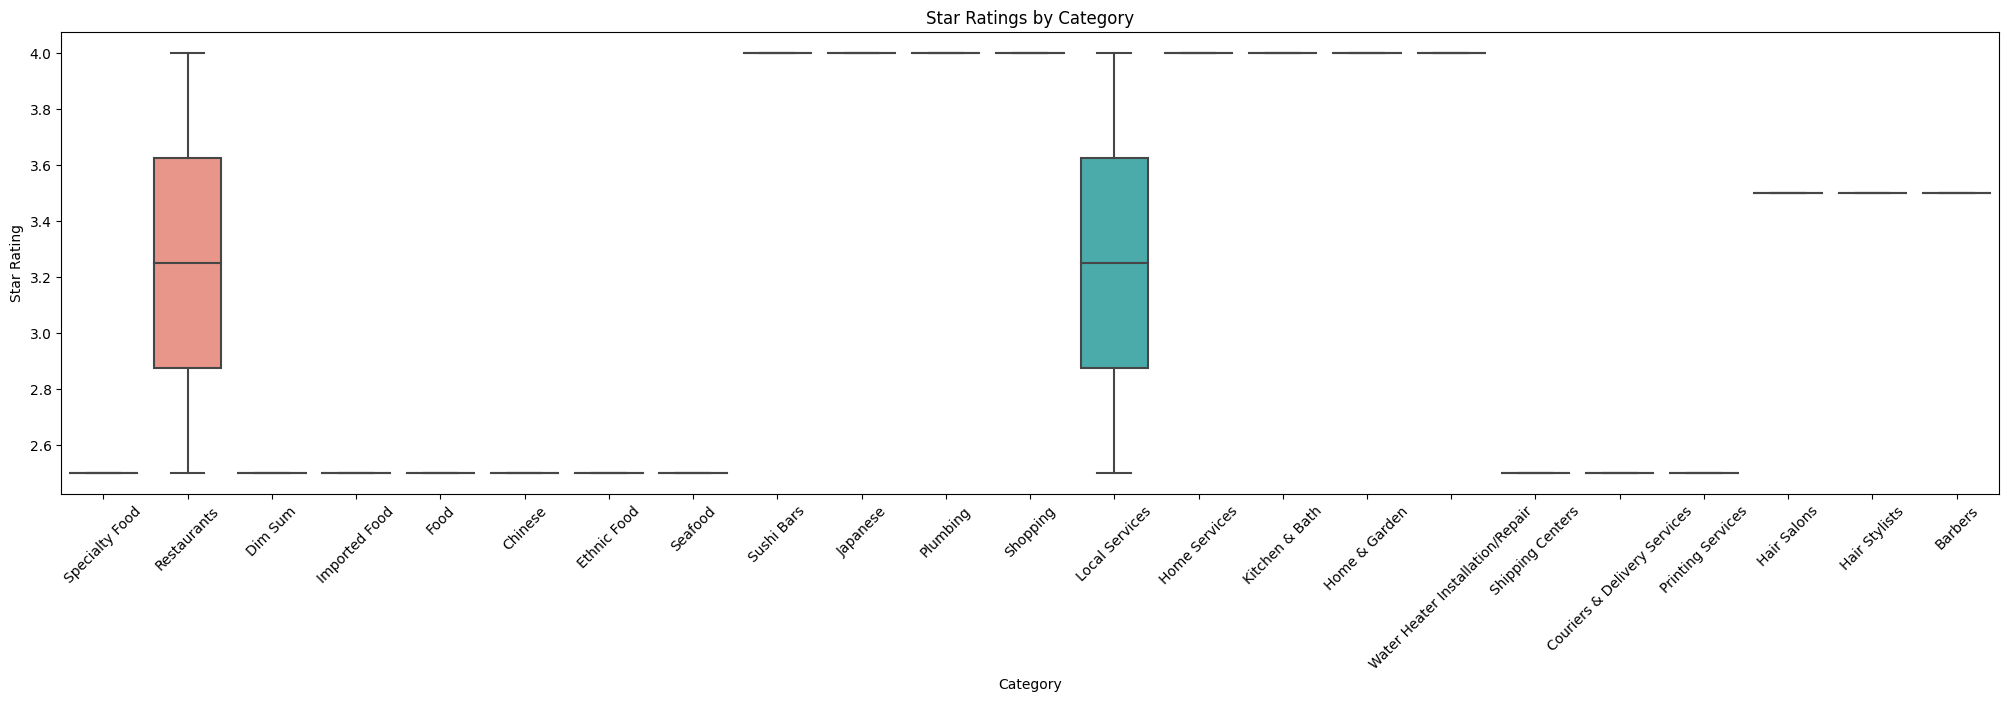

In [29]:
category_stars = []
for idx, row in df.iterrows():
    for cat in row['categories'].split(', '):
        category_stars.append({'Category': cat, 'Stars': row['stars']})
category_stars_df = pd.DataFrame(category_stars)
plt.figure(figsize=(25, 6))
sns.boxplot(x='Category', y='Stars', data=category_stars_df[: 25])
plt.title('Star Ratings by Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Star Rating')
plt.show()

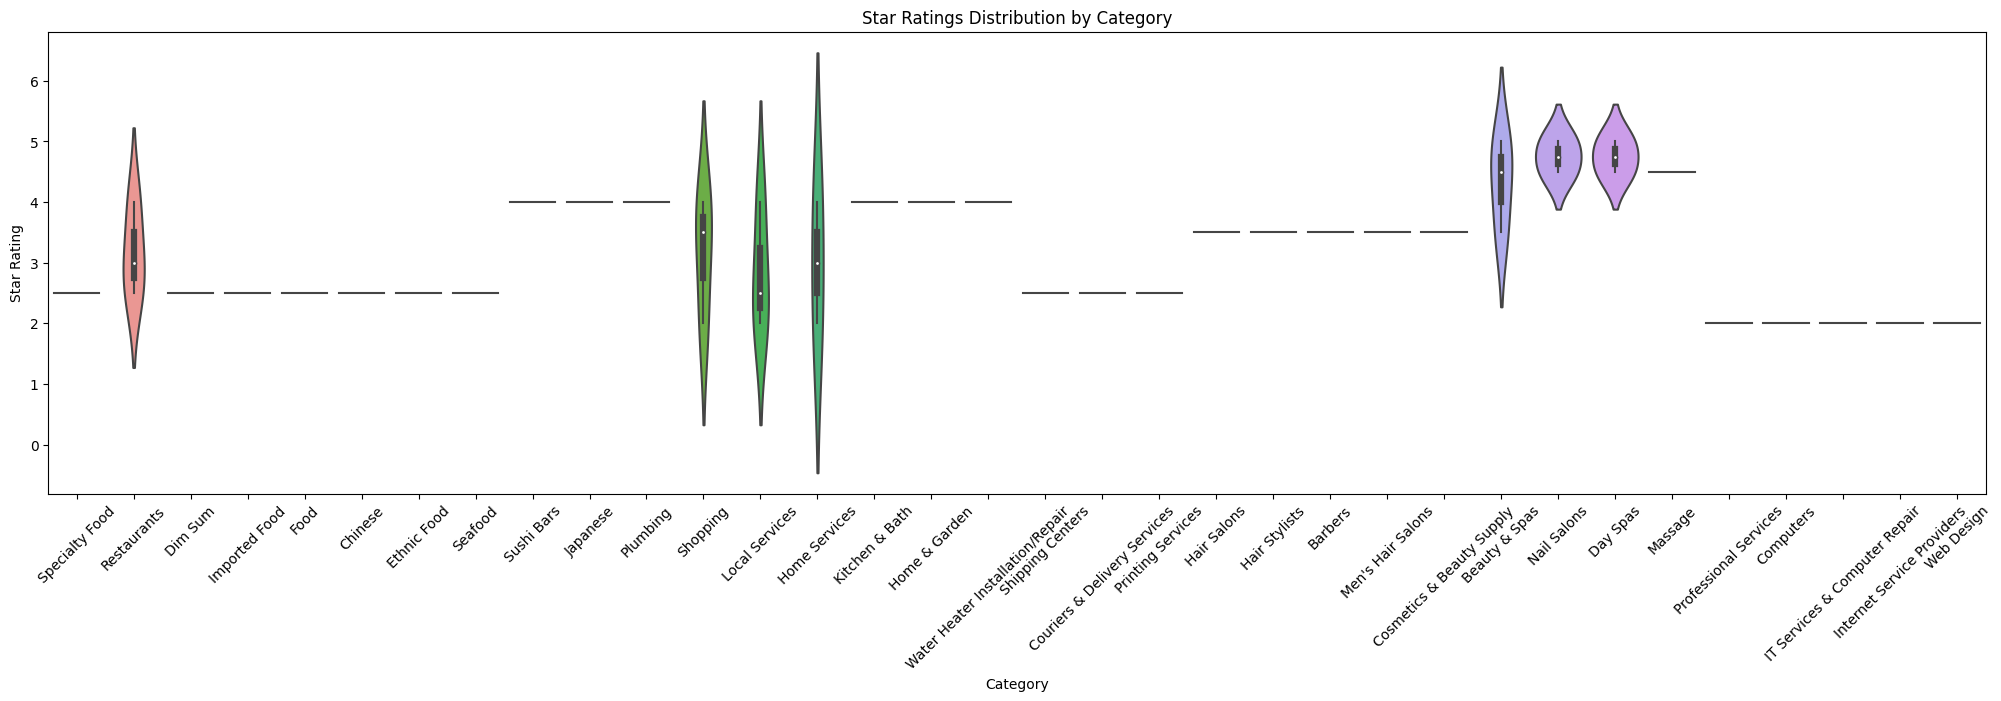

In [30]:
plt.figure(figsize=(25, 6))
sns.violinplot(x='Category', y='Stars', data=category_stars_df[: 45])
plt.title('Star Ratings Distribution by Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Star Rating')
plt.show()

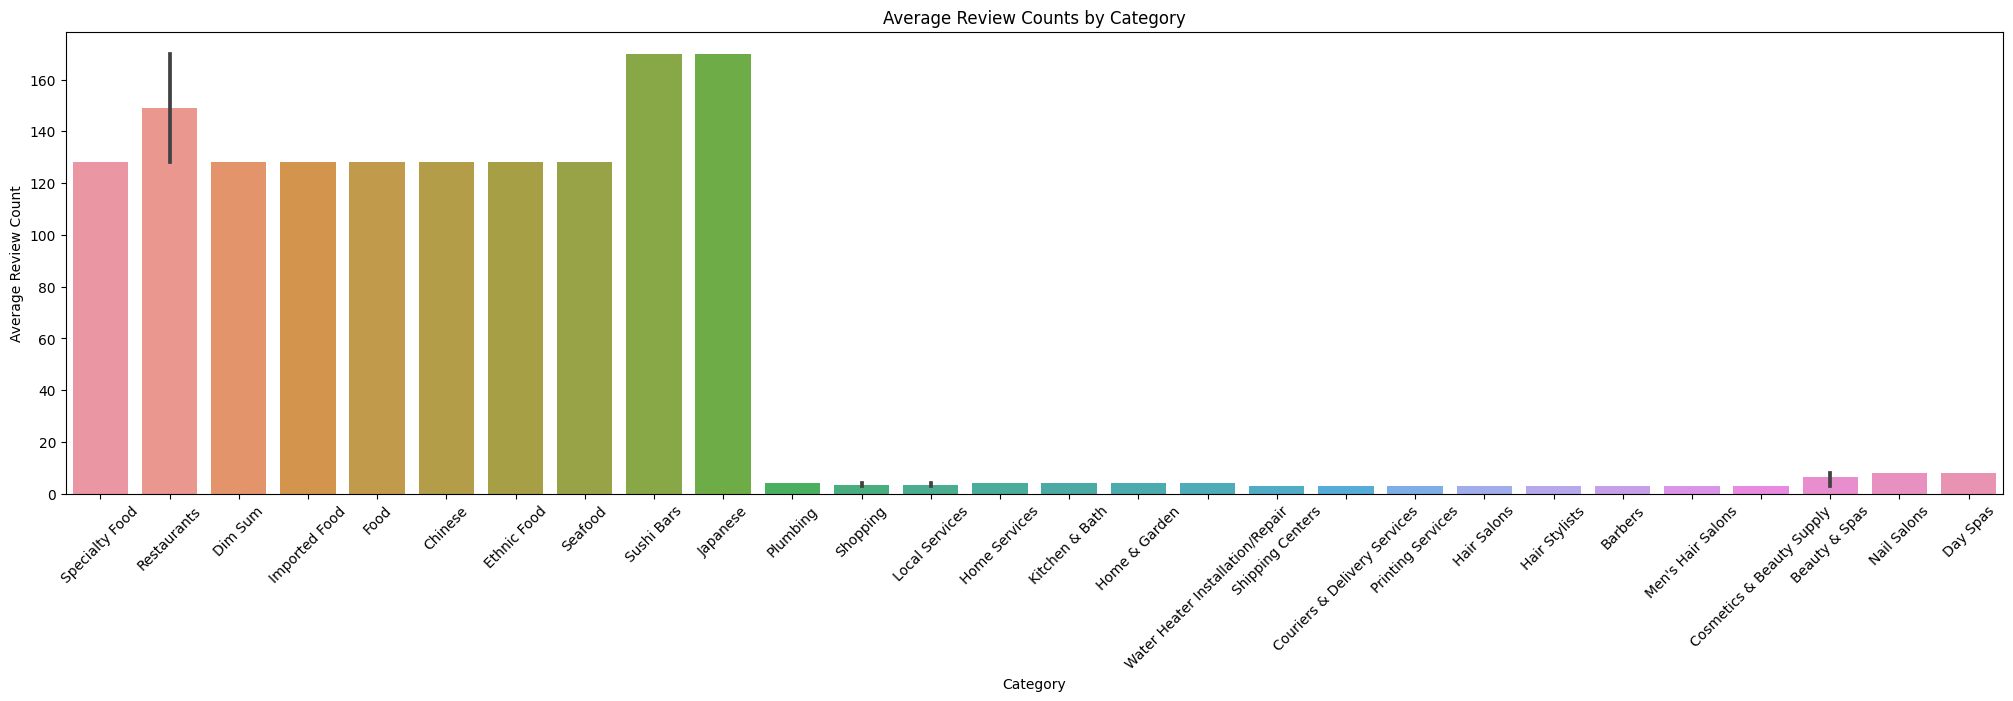

In [31]:
category_reviews = []
for idx, row in df.iterrows():
    for cat in row['categories'].split(', '):
        category_reviews.append({'Category': cat, 'Review_Count': row['review_count']})
category_reviews_df = pd.DataFrame(category_reviews)
plt.figure(figsize=(25, 6))
sns.barplot(x='Category', y='Review_Count', data=category_reviews_df[:35], estimator=np.mean)
plt.title('Average Review Counts by Category')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Review Count')
plt.show()

In [32]:
df.drop(columns=["business_id","state","postal_code","latitude","longitude","hours"],axis=1,inplace=True)

In [33]:
import ast

def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except:
        return val

def flatten_attributes(attr_dict):
    flat_dict = {}
    for key, value in attr_dict.items():
        if isinstance(value, str):
            nested = safe_literal_eval(value)
            if isinstance(nested, dict):
                for sub_key, sub_val in nested.items():
                    flat_dict[f"{key}_{sub_key}"] = sub_val
            else:
                flat_dict[key] = nested
        else:
            flat_dict[key] = value
    return flat_dict

# Apply safely to the column
df['attributes'] = df['attributes'].apply(safe_literal_eval)
df['attributes'] = df['attributes'].apply(flatten_attributes)


In [34]:
df.head()

,name,address,city,stars,review_count,is_open,attributes,categories
1,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,2.5,128,1,"{'RestaurantsReservations': True, 'GoodForMeal...","Specialty Food, Restaurants, Dim Sum, Imported..."
2,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,4.0,170,1,"{'GoodForKids': True, 'NoiseLevel': 'average',...","Sushi Bars, Restaurants, Japanese"
4,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,4.0,4,1,"{'BusinessAcceptsBitcoin': False, 'ByAppointme...","Plumbing, Shopping, Local Services, Home Servi..."
5,The UPS Store,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd",Mississauga,2.5,3,1,"{'BusinessParking_garage': False, 'BusinessPar...","Shipping Centers, Couriers & Delivery Services..."
7,Supercuts,"4545 E Tropicana Rd Ste 8, Tropicana",Las Vegas,3.5,3,1,"{'RestaurantsPriceRange2': 3, 'GoodForKids': T...","Hair Salons, Hair Stylists, Barbers, Men's Hai..."


In [35]:
def parse_simple_keywords(input_str):
    return [kw.strip().lower() for kw in input_str.split(',') if kw.strip()]

def filter_by_true_keywords(df, keywords):
    def matches(attr_dict):
        if not isinstance(attr_dict, dict):
            return False
        for kw in keywords:
            found = False
            for key, value in attr_dict.items():
                if kw in key.lower() and value is True:
                    found = True
                    break
            if not found:
                return False
        return True
    return df[df['attributes'].apply(matches)]


# normalize features
restaurants=df[(df["is_open"]==1) & (df["categories"].str.contains("Restaurants",case=False,na=False))].copy()
scaler = MinMaxScaler()
restaurants['stars_norm'] = scaler.fit_transform(restaurants[['stars']])
restaurants['review_count_norm'] = scaler.fit_transform(restaurants[['review_count']])
restaurants['score'] = 0.6 * restaurants['stars_norm'] + 0.4 * restaurants['review_count_norm']

In [36]:
def recommend_restaurants(stars, review_count, categories, city, attributes):
    # Validate inputs
    categories = categories or 'Restaurants'
    stars = 3.0 if stars < 1.0 or stars > 5.0 else stars
    review_count = 0 if review_count < 0 else review_count
    attributes = attributes or 'GoodForKids,BusinessAcceptsCreditCards,OutdoorSeating'

    # Check if categories might be a city
    cities = restaurants['city'].str.lower().unique()
    is_city_like, score = process.extractOne(categories.lower(), cities, scorer=fuzz.token_sort_ratio)
    city_warning = f"Warning: '{categories}' appears to be a city, not a category. Consider specifying a category (e.g., Sushi Bars, Italian, Dim Sum)." if is_city_like and score >= 75 else ""

    # Filter by city
    filtered_df = restaurants.copy()
    matched_city = city
    if city:
        best_city, score = process.extractOne(city.lower(), cities, scorer=fuzz.token_sort_ratio)
        if score >= 75:
            filtered_df = filtered_df[filtered_df['city'].str.lower() == best_city]
            matched_city = best_city
        else:
            filtered_df = pd.DataFrame(columns=filtered_df.columns)
            matched_city = None

    # Fuzzy match categories
    if not filtered_df.empty:
        all_cats = filtered_df['categories'].str.split(', ').explode().str.strip().unique()
        best_cats = process.extractBests(categories, all_cats, scorer=fuzz.token_sort_ratio, score_cutoff=65, limit=3)
        cat_pattern = '|'.join([cat[0] for cat in best_cats]) if best_cats else 'Restaurants'
        filtered_df = filtered_df[filtered_df['categories'].str.contains(cat_pattern, case=False, na=False)]

    # Filter stars and review_count
    if not filtered_df.empty:
        filtered_df_strict = filtered_df[(filtered_df['stars'] >= stars) & (filtered_df['review_count'] >= review_count)]
        filtered_df = filtered_df_strict if not filtered_df_strict.empty else filtered_df[(filtered_df['stars'] >= stars * 0.8) & (filtered_df['review_count'] >= review_count * 0.5)]

    # Filter by attribute keywords
    if attributes and not filtered_df.empty:
        keywords = parse_simple_keywords(attributes)
        filtered_df = filter_by_true_keywords(filtered_df, keywords)

    # Get recommendations
    recommendations = filtered_df.sort_values('score', ascending=False).head(5)[['name', 'address', 'city', 'stars', 'review_count', 'categories']]

    # Fallback if no matches
    message = ""
    if recommendations.empty:
        message = f"No restaurants found for '{categories}' in '{city or 'Any City'}' with {stars:.1f}+ stars, {review_count}+ reviews, and '{attributes}'. Showing top restaurants."
        recommendations = restaurants.sort_values('score', ascending=False).head(5)[['name', 'address', 'city', 'stars', 'review_count', 'categories']]
    elif matched_city != city and city:
        message = f"No restaurants in '{city}', but found matches in '{matched_city}' for '{categories}'."
    elif not best_cats:
        message = f"No close match for category '{categories}', showing restaurants with similar categories."

    # Display with tabulate
    print("\n=== Recommendations ===")
    if city_warning:
        print(f"\n{city_warning}")
    if message:
        print(f"Note: {message}")
    table_data = [[row['name'][:29], row['address'][:39], row['city'], row['stars'], row['review_count'], row['categories'][:39]] for _, row in recommendations.iterrows()]
    print(tabulate(table_data, headers=["Name", "Address", "City", "Stars", "Reviews", "Categories"], tablefmt="grid", floatfmt=".1f"))


In [37]:
print("\n=== Restaurant Recommender ===")
stars = float(input("Resturant Stars (e.g. 2.5,4.0,3.5,4.5,3.0): "))
review_count = int(input("Review Count (e.g. 128,170,184,4,): "))
categories = input("Category (e.g., Sushi Bars,Italian,Dim Sum): ").strip()
city = input("City (e.g., Charlotte,Mississauga,Glendale,Fairview Park,Las Vegas): ").strip()
attributes = input("Attributes (e.g., GoodForKids,GoodForWifi,BusinessAcceptBitcoins): ").strip()
recommend_restaurants(stars, review_count, categories, city, attributes)


=== Restaurant Recommender ===


Resturant Stars (e.g. 2.5,4.0,3.5,4.5,3.0):  5
Review Count (e.g. 128,170,184,4,):  1000
Category (e.g., Sushi Bars,Italian,Dim Sum):  italian
City (e.g., Charlotte,Mississauga,Glendale,Fairview Park,Las Vegas):  fairview park
Attributes (e.g., GoodForKids,GoodForWifi,BusinessAcceptBitcoins):  goodforwifi



=== Recommendations ===
Note: No restaurants found for 'italian' in 'fairview park' with 5.0+ stars, 1000+ reviews, and 'goodforwifi'. Showing top restaurants.
+--------------------+-----------------------+-----------+---------+-----------+-----------------------------------------+
| Name               | Address               | City      |   Stars |   Reviews | Categories                              |
+====================+=======================+===========+=========+===========+=========================================+
| Mon Ami Gabi       | 3655 Las Vegas Blvd S | Las Vegas |     4.0 |      8348 | Food, French, Breakfast & Brunch, Resta |
+--------------------+-----------------------+-----------+---------+-----------+-----------------------------------------+
| Bacchanal Buffet   | 3570 S Las Vegas Blvd | Las Vegas |     4.0 |      8339 | Restaurants, Buffets, Sandwiches, Food, |
+--------------------+-----------------------+-----------+---------+-----------+---------------------

In [38]:
! pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.13
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
alembic==1.16.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.2
arrow==1.3.0
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.23.0.39.50
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
bayesian-optimization==3.0.0
beartype==0.21.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.0
bokeh==3.7.3
Boruta==0.4.3
boto3==1.39.1
botocore==1.39.1
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb